# Data Analysis, Root cause analysis and modeling on production line in PRODCO

### PRODCO – Production Company
PRODCO is a multinational Manufacturing Company operating in a European country. They produce high tech products for different industries.

PRODCO installed a new integrated production line last year for more than €100million that started production 6
months ago. However, since switching on the line, they have experienced high defect rates which prevented them
reaching their production targets, causing massive additional costs.

PRODCO’s engineering team have identified that the high defect rate is due to mechanical issues with the
production process and not a failure of quality control on raw materials. They have been trying to fix the problems
on their production line, but the general defect rate remains high.

PRODCO’s engineering team have tried several approaches to reduce the number of finished items that need
quality checks, but they were unable to detect defects in some shipped production batches before they left the
factory. This resulted in high volumes of complaint claims from customers. As a result, PRODCO’s Quality Control
team is having to inspect every item that comes off the production line, resulting in additional personnel costs and
backlogs on orders.

PRODCO have contracted your team to urgently do a root cause analysis as a Proof of Concept for a defect
detection model, which will better enable their engineering team to pinpoint the location of the issues in order to
perform required maintenance and repairs. The engineering team have requested that the model be easily
explained and ‘analytics jargon free’.

PRODCO’s executive team are considering implementing similar models across their factories. The executive team
are not strangers to analytical models, and while they would like the models to be easily explained to the Quality
Control and Engineering teams, their primary goal is to use this Proof of Concept to showcase the potential uses
and effectiveness of multivariate analyses and advanced analytics.

### Current Defect Detection Process
PRODCO’s manufacturing process allows engineers to track the path that individual items and component parts
take through the production line. Sensors in different zones track environmental measures and the time taken for
an item to move through the zone. PRODCO’s current defect detection process is based on a visual inspection of
the item at the end of the production line, which classifies each product into ‘Pass’ or one of five defect types. To
perform maintenance or remediation work, Engineers use the defect type combined with the data showing path,
environment, and durations in and between zones for each item to try to identify the root cause of the defect.
Individual types of product (identified using Stock Keeping Unit (SKU) IDs) may show different defect rates due to
slight differences in their physical manufacturing process, but all SKUs show some incidence of defects.

### Data
PRODCO keeps production data about each item that has gone through their manufacturing process in a single big
table. This table contains: SKU ID, path (position & environment in zone) through the production line, time elapsed
in and between zones, and pass/defect type recorded by Quality Control.
For the purposes of this POC, PRODCO have provided:
<br>• Production Data for last 3 months with 75,000 records
<br>• Data dictionary
<br>• Maintenance costs

#### Business Questions
- Which area in the production line has the highest defect rate?

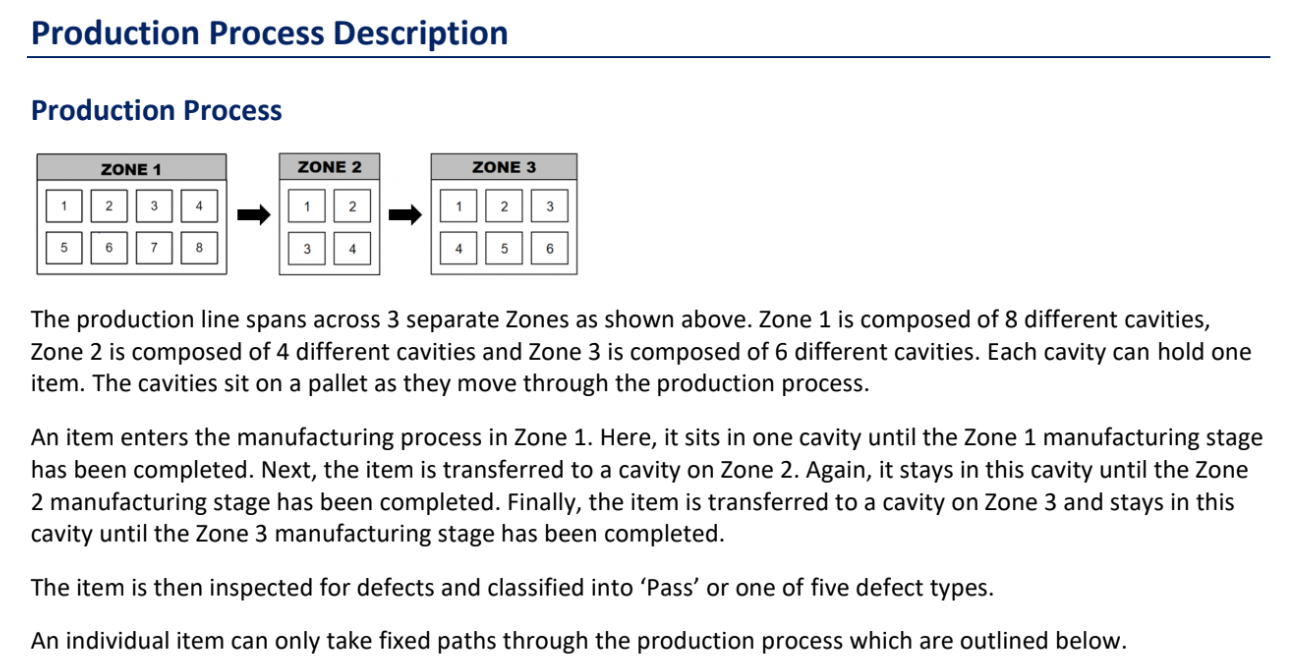

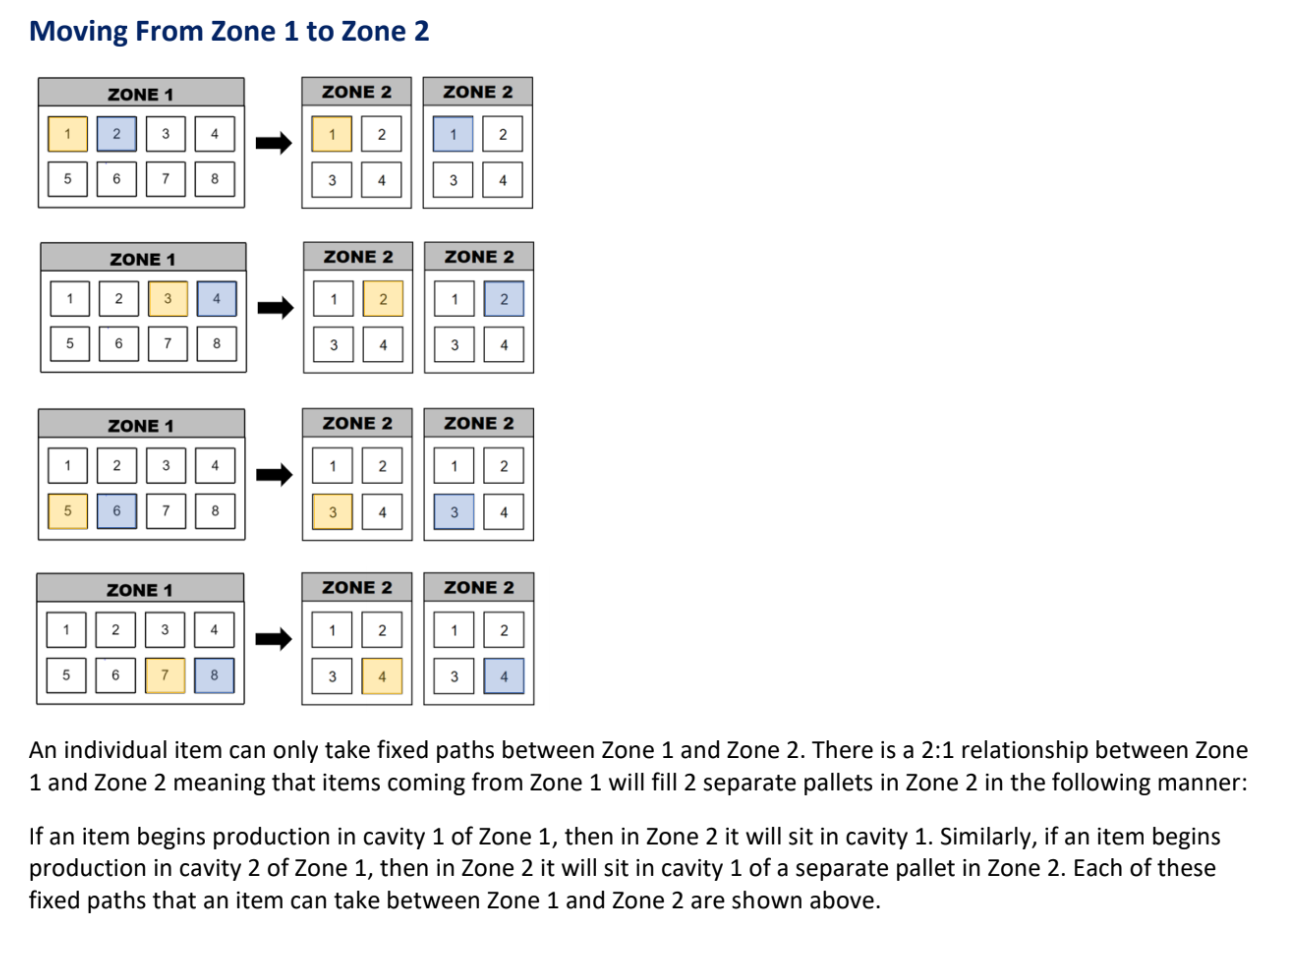

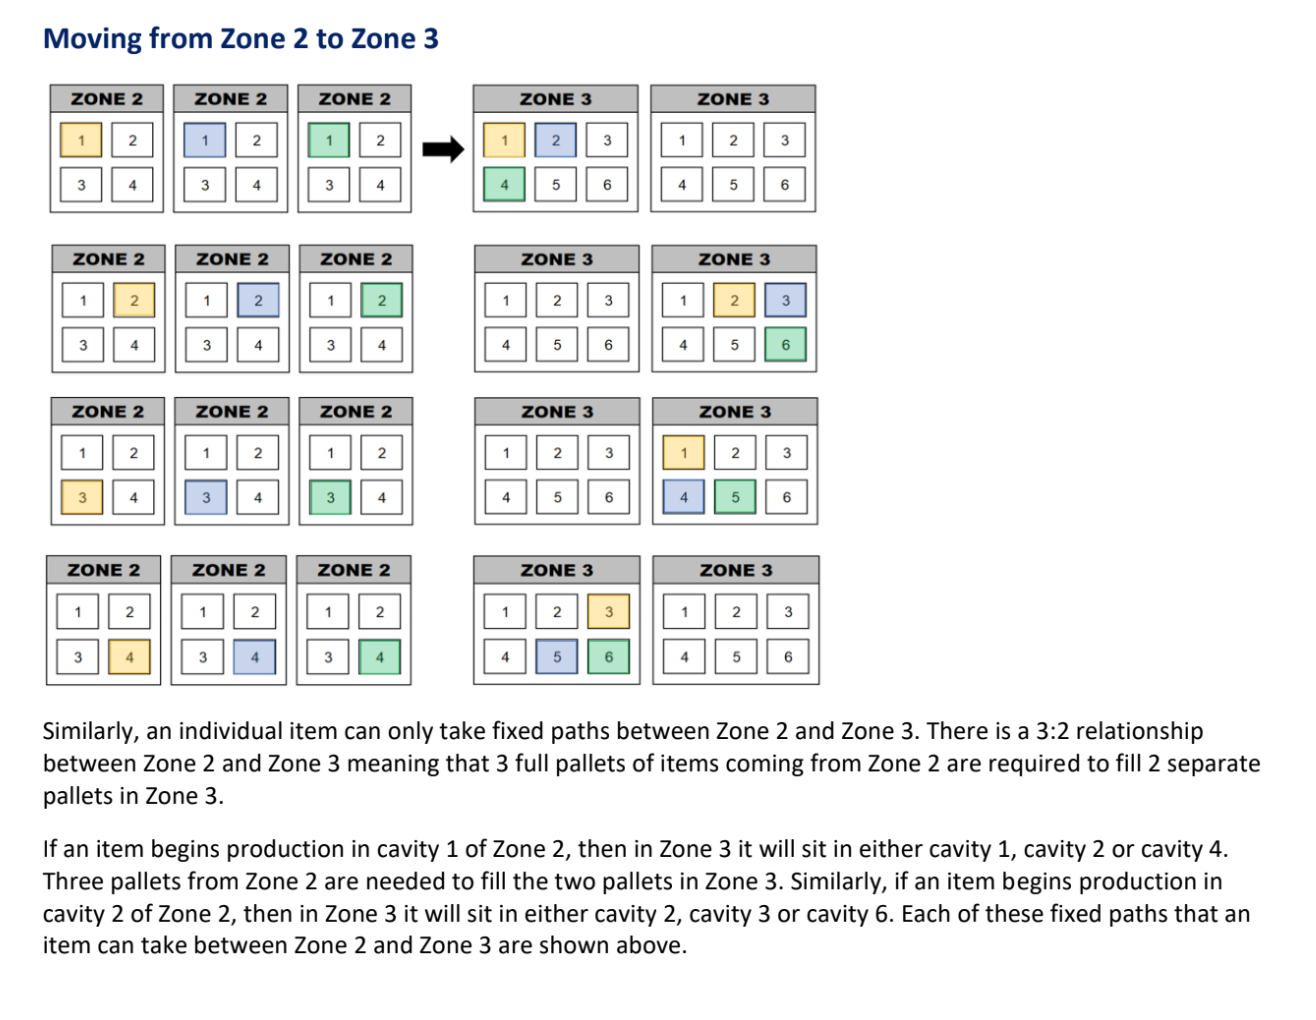

In [1]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import datetime
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


pd.set_option('display.max_columns', 200)
pd.set_option('display.max_rows', 300)

In [2]:
# load dataset
df = pd.read_csv('WIDS Dataset_2020_Adj.csv')

# Data Understanding

In [3]:
df.head()

X        Date  Zone1Position  Zone2Position  Zone3Position   SKU  \
0  1  09/01/2020            3.0            2.0            3.0  A001   
1  2  03/12/2019            8.0            4.0            3.0  A001   
2  3  21/11/2019            4.0            2.0            3.0  B003   
3  4  22/11/2019            6.0            3.0            1.0  B003   
4  5  23/12/2019            3.0            2.0            3.0  B003   

   Zone1_Row_Num  Zone1_Col_Num  Zone2_Row_Num  Zone2_Col_num  Zone3_Row_Num  \
0            1.0            3.0            1.0            2.0            1.0   
1            2.0            4.0            2.0            2.0            1.0   
2            1.0            4.0            1.0            2.0            1.0   
3            2.0            2.0            2.0            1.0            1.0   
4            1.0            3.0            1.0            2.0            1.0   

   Zone3_Col_Num  Zone1_Left_Block_Bin  Zone1_Right_Block_Bin    Zone1_Area  \
0            3.0                   0.0                    1.0     Top Right   
1            3.0                   0.0                    1.0  Bottom Right   
2            3.0                   0.0                    1.0     Top Right   
3            1.0                   1.0                    0.0   Bottom Left   
4            3.0                   0.0                    1.0     Top Right   

     Zone3_Area  Zone1_Dur  Zone2_Dur  Zone3_Dur  Zone1_Out_Zone2_In_Dur  \
0  Bottom Right      14.79      49.55       26.0                    4.79   
1  Bottom Right      17.19      47.53       29.0                    3.04   
2  Bottom Right      16.54      50.23       23.0                    4.79   
3      Top Left       8.64      49.41       28.0                    3.66   
4  Bottom Right      17.19      49.66       30.0                    3.04   

   Zone1_Out_Zone3_In_Dur  Zone2_Out_Zone3_In_Dur  Zone1_In_Zone3_Out_Dur  \
0                   62.17                    6.71                  101.73   
1                   56.72                    3.34                   99.31   
2                   60.24                    7.30                  100.02   
3                   58.16                    6.69                  100.45   
4                   61.47                    5.56                   99.74   

   Zone1_In_Zone2_Out_Dur  Zone2_In_Zone3_Out_Dur  Zone1_Temp_Avg  \
0                   66.90                   81.67           23.38   
1                   67.68                   79.16           23.01   
2                   72.82                   80.18           23.38   
3                   67.54                   80.45           23.73   
4                   69.20                   79.60           24.88   

   Zone1_Temp_Min  Zone1_Temp_Max  Zone1_Temp_Range  Zone2_Temp_Avg  \
0           20.38           26.38               6.0           21.47   
1           18.01           28.01              10.0           21.34   
2           15.38           31.38              16.0           21.47   
3           22.73           24.73               2.0           21.88   
4           19.88           29.88              10.0           21.70   

   Zone2_Temp_Min  Zone2_Temp_Max  Zone2_Temp_Range  Zone3_Temp_Avg  \
0           15.47           27.47              12.0           24.46   
1           18.34           24.34               6.0           24.84   
2           16.47           26.47              10.0           25.24   
3           19.88           23.88               4.0           25.63   
4           19.70           23.70               4.0           25.98   

   Zone3_Temp_Min  Zone3_Temp_Max  Zone3_Temp_Range  Zone1_Humidity_Avg  \
0           18.46           30.46              12.0               39.32   
1           19.84           29.84              10.0               36.87   
2           19.24           31.24              12.0               38.94   
3           16.63           34.63              18.0               33.57   
4           19.98           31.98              12.0     

- There is 53 columns and 75750 rows (maximum)

In [4]:
# Check numbers of rows
df.shape

(75750, 53)

In [5]:
# Check numbers of colmns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75750 entries, 0 to 75749
Data columns (total 53 columns):
X                         75750 non-null int64
Date                      75707 non-null object
Zone1Position             75712 non-null float64
Zone2Position             75706 non-null float64
Zone3Position             75713 non-null float64
SKU                       75711 non-null object
Zone1_Row_Num             75715 non-null float64
Zone1_Col_Num             75708 non-null float64
Zone2_Row_Num             75704 non-null float64
Zone2_Col_num             75716 non-null float64
Zone3_Row_Num             75713 non-null float64
Zone3_Col_Num             75714 non-null float64
Zone1_Left_Block_Bin      75708 non-null float64
Zone1_Right_Block_Bin     75710 non-null float64
Zone1_Area                75709 non-null object
Zone3_Area                75718 non-null object
Zone1_Dur                 75713 non-null float64
Zone2_Dur                 75708 non-null float64
Zone3_Dur      

In [6]:
# check values in Zone3_Area 
df['Zone3_Area'].value_counts()

Top Left        37919
Bottom Right    37799
Name: Zone3_Area, dtype: int64

- Some of the columns have missing values but they are all not huge amount, so just droping them could be okay. Otherwise, we could fill the null if the data is based on continuous nature (e.g. timestamps)
- Result_Type - This is the target variable that we're trying to predict.

## Data Cleaning
#### Assigning proper data types
1. Data: has to be datetime
2. Zone1Position, Zone2Position, Zone3Position: has to be categorical(ordinal)
3. Zone1_Row_Num, Zone1_Col_Num, Zone2_Row_Num, Zone2_Col_num, Zone3_Row_Num, Zone3_Col_Num: has to be categorical(ordinal)
4. Zone1_Left_Block_Bin, Zone1_Right_Block_Bin: has to be categorical(ordinal)
5. Block_Num, Block_Position: has to be categorical(ordinal)
<br>*The way to change the columns' datatype to 'categorical'
https://stackoverflow.com/questions/39928264/how-to-convert-all-columns-from-numeric-to-categorical-using-python*

#### Dropping nulls / Values
- At the moment, just drop rows if there is null values

### Basic information about columns according to Data Dictionary<br>

- Information of the positions in the zone (position/row/col in 1,2,3 zone)
- Connection between zone1 area - zone2 position
  (Top Left -> 1, Top Right -> 2, Bottom left -> 3, Bottom Right -> 4)
- Duration time (during in each zone, or inbetween the zones)
- Information of blocks which are used only in Zone1.
- Result_type (which contains if the product was passed through the test or not. Also provides Defect type 1-5)
- We can drop "Block_Orientation" column since it has only one value (1), as well as "X" column as this is just the number of columns

<br>Continuous variables
- Tempature (avg, min, max, range) 
- Humidity (avg, min, max, range)

<br>My questions after reading Data Dictionary:
1. Zone1_Left_Block_Bin, Zone1_Right_Block_Bin: I don't understand the importance of this values -> The client's anwer: Block number is Molds number* 
2. Zone3_Area: Why there is no "Top right" "Bottom left" ? -> The client's anwer: Might be a technical issue in the product line
3. What are the defect types 1-5 respectively?
4. General queestion: can we upload this data to public? (Github or Tableau Public)

*Additional information from the client*
<br>SKU - ID number, Identifier
<br>The duration time should be same and there should not be big difference between

## Data Cleaning

In [7]:
# 1. convert 'Date' datatype from objdct to datetime
df['Date'] = pd.to_datetime(df['Date'])

In [8]:
df.head()

X       Date  Zone1Position  Zone2Position  Zone3Position   SKU  \
0  1 2020-09-01            3.0            2.0            3.0  A001   
1  2 2019-03-12            8.0            4.0            3.0  A001   
2  3 2019-11-21            4.0            2.0            3.0  B003   
3  4 2019-11-22            6.0            3.0            1.0  B003   
4  5 2019-12-23            3.0            2.0            3.0  B003   

   Zone1_Row_Num  Zone1_Col_Num  Zone2_Row_Num  Zone2_Col_num  Zone3_Row_Num  \
0            1.0            3.0            1.0            2.0            1.0   
1            2.0            4.0            2.0            2.0            1.0   
2            1.0            4.0            1.0            2.0            1.0   
3            2.0            2.0            2.0            1.0            1.0   
4            1.0            3.0            1.0            2.0            1.0   

   Zone3_Col_Num  Zone1_Left_Block_Bin  Zone1_Right_Block_Bin    Zone1_Area  \
0            3.0                   0.0                    1.0     Top Right   
1            3.0                   0.0                    1.0  Bottom Right   
2            3.0                   0.0                    1.0     Top Right   
3            1.0                   1.0                    0.0   Bottom Left   
4            3.0                   0.0                    1.0     Top Right   

     Zone3_Area  Zone1_Dur  Zone2_Dur  Zone3_Dur  Zone1_Out_Zone2_In_Dur  \
0  Bottom Right      14.79      49.55       26.0                    4.79   
1  Bottom Right      17.19      47.53       29.0                    3.04   
2  Bottom Right      16.54      50.23       23.0                    4.79   
3      Top Left       8.64      49.41       28.0                    3.66   
4  Bottom Right      17.19      49.66       30.0                    3.04   

   Zone1_Out_Zone3_In_Dur  Zone2_Out_Zone3_In_Dur  Zone1_In_Zone3_Out_Dur  \
0                   62.17                    6.71                  101.73   
1                   56.72                    3.34                   99.31   
2                   60.24                    7.30                  100.02   
3                   58.16                    6.69                  100.45   
4                   61.47                    5.56                   99.74   

   Zone1_In_Zone2_Out_Dur  Zone2_In_Zone3_Out_Dur  Zone1_Temp_Avg  \
0                   66.90                   81.67           23.38   
1                   67.68                   79.16           23.01   
2                   72.82                   80.18           23.38   
3                   67.54                   80.45           23.73   
4                   69.20                   79.60           24.88   

   Zone1_Temp_Min  Zone1_Temp_Max  Zone1_Temp_Range  Zone2_Temp_Avg  \
0           20.38           26.38               6.0           21.47   
1           18.01           28.01              10.0           21.34   
2           15.38           31.38              16.0           21.47   
3           22.73           24.73               2.0           21.88   
4           19.88           29.88              10.0           21.70   

   Zone2_Temp_Min  Zone2_Temp_Max  Zone2_Temp_Range  Zone3_Temp_Avg  \
0           15.47           27.47              12.0           24.46   
1           18.34           24.34               6.0           24.84   
2           16.47           26.47              10.0           25.24   
3           19.88           23.88               4.0           25.63   
4           19.70           23.70               4.0           25.98   

   Zone3_Temp_Min  Zone3_Temp_Max  Zone3_Temp_Range  Zone1_Humidity_Avg  \
0           18.46           30.46              12.0               39.32   
1           19.84           29.84              10.0               36.87   
2           19.24           31.24              12.0               38.94   
3           16.63           34.63              18.0               33.57   
4           19.98           31.98              12.0           

In [9]:
# 2. convert the columns to categorical(ordinal)
col_convert = ['Zone1Position', 'Zone2Position', 'Zone3Position', 
               'Zone1_Row_Num', 'Zone1_Col_Num', 'Zone2_Row_Num', 'Zone2_Col_num', 'Zone3_Row_Num', 'Zone3_Col_Num',
               'Zone1_Left_Block_Bin', 'Zone1_Right_Block_Bin', 'Block_Num', 'Block_Position']

for col in col_convert:
    df[col] = df[col].astype('category',copy=False)

In [10]:
# 3. drop 'Block_Orientation' column since this column has only one value
df = df.drop(columns = ['X', 'Block_Orientation'])

In [11]:
# 4. dropping all the rows that have missing data
df.dropna(inplace=True)

In [12]:
# check the number of rows after dropping nulls
df.shape

(73770, 51)

- 1.6% of the original data is dropped 

## Exploratory Data Analysis

In [13]:
n_count = df.groupby(['Date', 'Result_Type']).count().reset_index()
n_count['count'] = n_count['Zone1Position']
n_count_clean = n_count[['count', 'Date', 'Result_Type']]

In [14]:
n_count_clean.head(6)

count       Date Result_Type
0     42 2019-01-12    Defect_1
1     43 2019-01-12    Defect_2
2     74 2019-01-12    Defect_3
3     32 2019-01-12    Defect_4
4     38 2019-01-12    Defect_5
5    538 2019-01-12        PASS

In [15]:
# the number of defect
n_def1 = n_count_clean.query('Result_Type=="Defect_1"')[['Date','count']]
n_def2 = n_count_clean.query('Result_Type=="Defect_2"')[['Date','count']]
n_def3 = n_count_clean.query('Result_Type=="Defect_3"')[['Date','count']]
n_def4 = n_count_clean.query('Result_Type=="Defect_4"')[['Date','count']]
n_def5 = n_count_clean.query('Result_Type=="Defect_5"')[['Date','count']]
n_pass = n_count_clean.query('Result_Type=="PASS"')[['Date','count']]

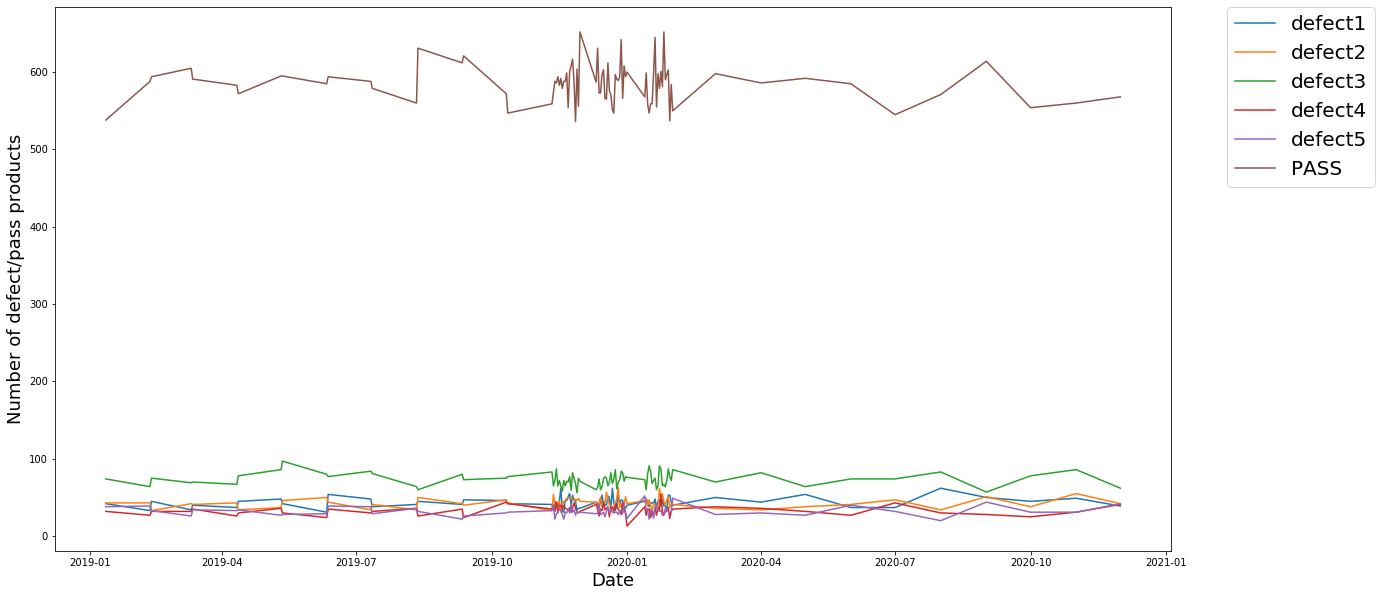

In [16]:
plt.figure(figsize=(20,10))
plt.plot(n_def1['Date'], n_def1['count'], label='defect1');
plt.plot(n_def2['Date'], n_def2['count'], label='defect2');
plt.plot(n_def3['Date'], n_def3['count'], label='defect3');
plt.plot(n_def4['Date'], n_def4['count'], label='defect4');
plt.plot(n_def5['Date'], n_def5['count'], label='defect5');
plt.plot(n_pass['Date'], n_pass['count'], label='PASS');
plt.xlabel('Date', fontsize=18)
plt.ylabel('Number of defect/pass products', fontsize=18)
plt.legend(bbox_to_anchor=(1.05, 1), loc="upper left", borderaxespad=0, fontsize=20)

- First data: January 2019, Last data: December 2020
- There are many data points between November 2019 and Febuary 2020

In [17]:
# divide numerical and categorical columns 
# numerical columns 
num_col = ['Zone1_Dur', 'Zone2_Dur', 'Zone3_Dur','Zone1_Out_Zone2_In_Dur','Zone1_Out_Zone3_In_Dur','Zone2_Out_Zone3_In_Dur',
'Zone1_In_Zone3_Out_Dur','Zone1_In_Zone2_Out_Dur','Zone2_In_Zone3_Out_Dur','Zone1_Temp_Avg','Zone1_Temp_Min',
'Zone1_Temp_Max','Zone1_Temp_Range','Zone2_Temp_Avg','Zone2_Temp_Min','Zone2_Temp_Max','Zone2_Temp_Range',
'Zone3_Temp_Avg','Zone3_Temp_Min','Zone3_Temp_Max','Zone3_Temp_Range','Zone1_Humidity_Avg','Zone1_Humidity_Min',
'Zone1_Humidity_Max','Zone1_Humidity_Range','Zone2_Humidity_Avg','Zone2_Humidity_Min','Zone2_Humidity_Max',
'Zone2_Humidity_Range','Zone3_Humidity_Avg','Zone3_Humidity_Min','Zone3_Humidity_Max','Zone3_Humidity_Range']

# categorical columns 
cat_col = ['Zone1Position', 'Zone2Position', 'Zone3Position', 'SKU',
          'Zone1_Row_Num', 'Zone1_Col_Num', 'Zone2_Row_Num', 'Zone2_Col_num', 'Zone3_Row_Num', 'Zone3_Col_Num',
          'Zone1_Left_Block_Bin', 'Zone1_Right_Block_Bin', 'Zone1_Area', 'Zone3_Area', 'Block_Num', 'Block_Position', 
           'Result_Type']

In [18]:
# Describe method on numerical variablles
df[num_col].describe()

Zone1_Dur     Zone2_Dur     Zone3_Dur  Zone1_Out_Zone2_In_Dur  \
count  73770.000000  73770.000000  73770.000000            73770.000000   
mean      14.632382     49.669578     26.057191                3.922098   
std        2.668649      1.104946      5.015190                1.045168   
min        8.640000     47.530000     11.000000                1.580000   
25%       12.760000     49.130000     23.000000                3.190000   
50%       14.930000     49.640000     27.000000                3.910000   
75%       16.540000     50.520000     29.000000                4.590000   
max       19.860000     51.720000     36.000000                6.850000   

       Zone1_Out_Zone3_In_Dur  Zone2_Out_Zone3_In_Dur  Zone1_In_Zone3_Out_Dur  \
count            73770.000000            73770.000000            73770.000000   
mean                59.622863                6.016544               99.995903   
std                  1.974225                0.844662                0.968791   
min                 55.360000                3.340000               97.780000   
25%                 58.160000                5.560000               99.310000   
50%                 59.430000                6.030000              100.040000   
75%                 61.000000                6.590000              100.450000   
max                 64.380000                7.300000              101.730000   

       Zone1_In_Zone2_Out_Dur  Zone2_In_Zone3_Out_Dur  Zone1_Temp_Avg  \
count            73770.000000            73770.000000    73770.000000   
mean                70.235434               79.976104       23.595973   
std                  2.978912                1.629272        0.557036   
min                 64.530000               77.140000       22.330000   
25%                 68.020000               78.980000       23.290000   
50%                 69.400000               79.620000       23.730000   
75%                 72.290000               80.740000       23.960000   
max                 79.520000               83.310000       24.880000   

       Zone1_Temp_Min  Zone1_Temp_Max  Zone1_Temp_Range  Zone2_Temp_Avg  \
count    73770.000000    73770.000000      73770.000000    73770.000000   
mean        19.247864       27.944082          8.696218       21.644678   
std          2.835832        2.840571          5.566005        0.463661   
min         11.330000       23.330000          2.000000       20.760000   
25%         18.440000       25.960000          4.000000       21.450000   
50%         20.020000       27.020000          6.000000       21.530000   
75%         21.070000       28.860000         10.000000       21.880000   
max         23.880000       35.880000         22.000000       22.730000   

       Zone2_Temp_Min  Zone2_Temp_Max  Zone2_Temp_Range  Zone3_Temp_Avg  \
count    73770.000000    73770.000000      73770.000000    73770.000000   
mean        17.776208       25.513147          7.736939       25.094491   
std          2.019417        2.014096          3.925472        0.681720   
min         13.760000       21.760000          2.000000       23.970000   
25%         16.070000       23.760000          4.000000       24.710000   
50%         17.960000       25.400000          6.000000       25.220000   
75%         19.480000       27.190000         10.000000       25.400000   
max         21.730000       29.730000         14.000000       26.830000   

       Zone3_Temp_Min  Zone3_Temp_Max  Zone3_Temp_Range  Zone1_Humidity_Avg  \
count    73770.000000    73770.000000      73770.000000        73770.000000   
mean        21.526129       28.662852          7.136722           40.821425   
std          2.642877        2.644424          5.108482            5.105528   
min         14.970000       23.970000          0.000000           30.030000   
25%         19.830000       26.280000          2.000000           36.870000   
50%         21.630000       28.480000          8.000000           40.190000   
75%         23.890000       30.340000    

In [19]:
# Describe method on categorical variablles
df[cat_col].describe()

Zone1Position  Zone2Position  Zone3Position    SKU  Zone1_Row_Num  \
count         73770.0        73770.0        73770.0  73770        73770.0   
unique            8.0            4.0            6.0      5            2.0   
top               2.0            1.0            3.0   C005            1.0   
freq           9460.0        18577.0        12421.0  30759        36978.0   

        Zone1_Col_Num  Zone2_Row_Num  Zone2_Col_num  Zone3_Row_Num  \
count         73770.0        73770.0        73770.0        73770.0   
unique            4.0            2.0            2.0            2.0   
top               3.0            1.0            2.0            1.0   
freq          18620.0        36978.0        36933.0        37045.0   

        Zone3_Col_Num  Zone1_Left_Block_Bin  Zone1_Right_Block_Bin Zone1_Area  \
count         73770.0               73770.0                73770.0      73770   
unique            3.0                   2.0                    2.0          4   
top               3.0                   0.0                    1.0   Top Left   
freq          24694.0               36933.0                36933.0      18577   

       Zone3_Area  Block_Num  Block_Position Result_Type  
count       73770    73770.0         73770.0       73770  
unique          2        8.0             4.0           6  
top      Top Left     1002.0             2.0        PASS  
freq        36978     9418.0         18731.0       53262

In [20]:
df['Result_Type'].value_counts()/df.shape[0]*100

PASS        72.200081
Defect_3     9.014505
Defect_1     5.359902
Defect_2     5.316524
Defect_4     4.154805
Defect_5     3.954182
Name: Result_Type, dtype: float64

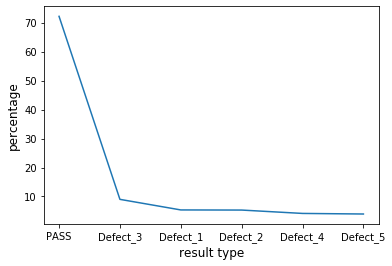

In [21]:
plt.plot(df['Result_Type'].value_counts()/df.shape[0]*100)
plt.xlabel('result type', fontsize=12)
plt.ylabel('percentage', fontsize=12);

- Pass rate is 72.2% and Defect rate is 27.8%
- Defect_3 is the highest followed by Defect_1, Defect_2, Defect_4, Defect_5

In [22]:
# Dummy encoding on categorical variables
# Reference: https://www.statisticssolutions.com/dummy-coding-the-how-and-why/
def create_dummy_df(df, cat_cols, dummy_na):
    for col in  cat_cols:
        try:
            # for each cat add dummy var, drop original column
            df = pd.concat([df.drop(col, axis=1), pd.get_dummies(df[col], prefix=col, prefix_sep='_', drop_first=False, dummy_na=dummy_na)], axis=1)
        except:
            continue
    return df

df_clean = create_dummy_df(df, cat_col, dummy_na=False)

In [23]:
df_clean.head()

Date  Zone1_Dur  Zone2_Dur  Zone3_Dur  Zone1_Out_Zone2_In_Dur  \
0 2020-09-01      14.79      49.55       26.0                    4.79   
1 2019-03-12      17.19      47.53       29.0                    3.04   
2 2019-11-21      16.54      50.23       23.0                    4.79   
3 2019-11-22       8.64      49.41       28.0                    3.66   
4 2019-12-23      17.19      49.66       30.0                    3.04   

   Zone1_Out_Zone3_In_Dur  Zone2_Out_Zone3_In_Dur  Zone1_In_Zone3_Out_Dur  \
0                   62.17                    6.71                  101.73   
1                   56.72                    3.34                   99.31   
2                   60.24                    7.30                  100.02   
3                   58.16                    6.69                  100.45   
4                   61.47                    5.56                   99.74   

   Zone1_In_Zone2_Out_Dur  Zone2_In_Zone3_Out_Dur  Zone1_Temp_Avg  \
0                   66.90                   81.67           23.38   
1                   67.68                   79.16           23.01   
2                   72.82                   80.18           23.38   
3                   67.54                   80.45           23.73   
4                   69.20                   79.60           24.88   

   Zone1_Temp_Min  Zone1_Temp_Max  Zone1_Temp_Range  Zone2_Temp_Avg  \
0           20.38           26.38               6.0           21.47   
1           18.01           28.01              10.0           21.34   
2           15.38           31.38              16.0           21.47   
3           22.73           24.73               2.0           21.88   
4           19.88           29.88              10.0           21.70   

   Zone2_Temp_Min  Zone2_Temp_Max  Zone2_Temp_Range  Zone3_Temp_Avg  \
0           15.47           27.47              12.0           24.46   
1           18.34           24.34               6.0           24.84   
2           16.47           26.47              10.0           25.24   
3           19.88           23.88               4.0           25.63   
4           19.70           23.70               4.0           25.98   

   Zone3_Temp_Min  Zone3_Temp_Max  Zone3_Temp_Range  Zone1_Humidity_Avg  \
0           18.46           30.46              12.0               39.32   
1           19.84           29.84              10.0               36.87   
2           19.24           31.24              12.0               38.94   
3           16.63           34.63              18.0               33.57   
4           19.98           31.98              12.0               39.43   

   Zone1_Humidity_Min  Zone1_Humidity_Max  Zone1_Humidity_Range  \
0               34.32               44.32                  10.0   
1               28.87               44.87                  16.0   
2               30.94               46.94                  16.0   
3               28.57               38.57                  10.0   
4               39.43               39.43                   0.0   

   Zone2_Humidity_Avg  Zone2_Humidity_Min  Zone2_Humidity_Max  \
0               56.80               51.80               61.80   
1               50.12               42.12               58.12   
2               45.97               40.97               50.97   
3               57.13               55.13               59.13   
4               56.80               47.80               65.80   

   Zone2_Humidity_Range  Zone3_Humidity_Avg  Zone3_Humidity_Min  \
0                  10.0               39.19               33.19   
1                  16.0               48.50               40.50   
2                  10.0               52.20               46.20   
3                   4.0               39.29               31.29   
4                  18.0               45.37               42.37   

   Zone3_Humidity_Max  Zone3_Humidity_Range  Zone1Position_1.0  \
0               45.19                  12.0                  0   
1               56.50                  16.0              

In [24]:
# Heat map preparation, appending PASS column (target value) to numerical columns 
cols2 = num_col
cols2.append('Result_Type_PASS')

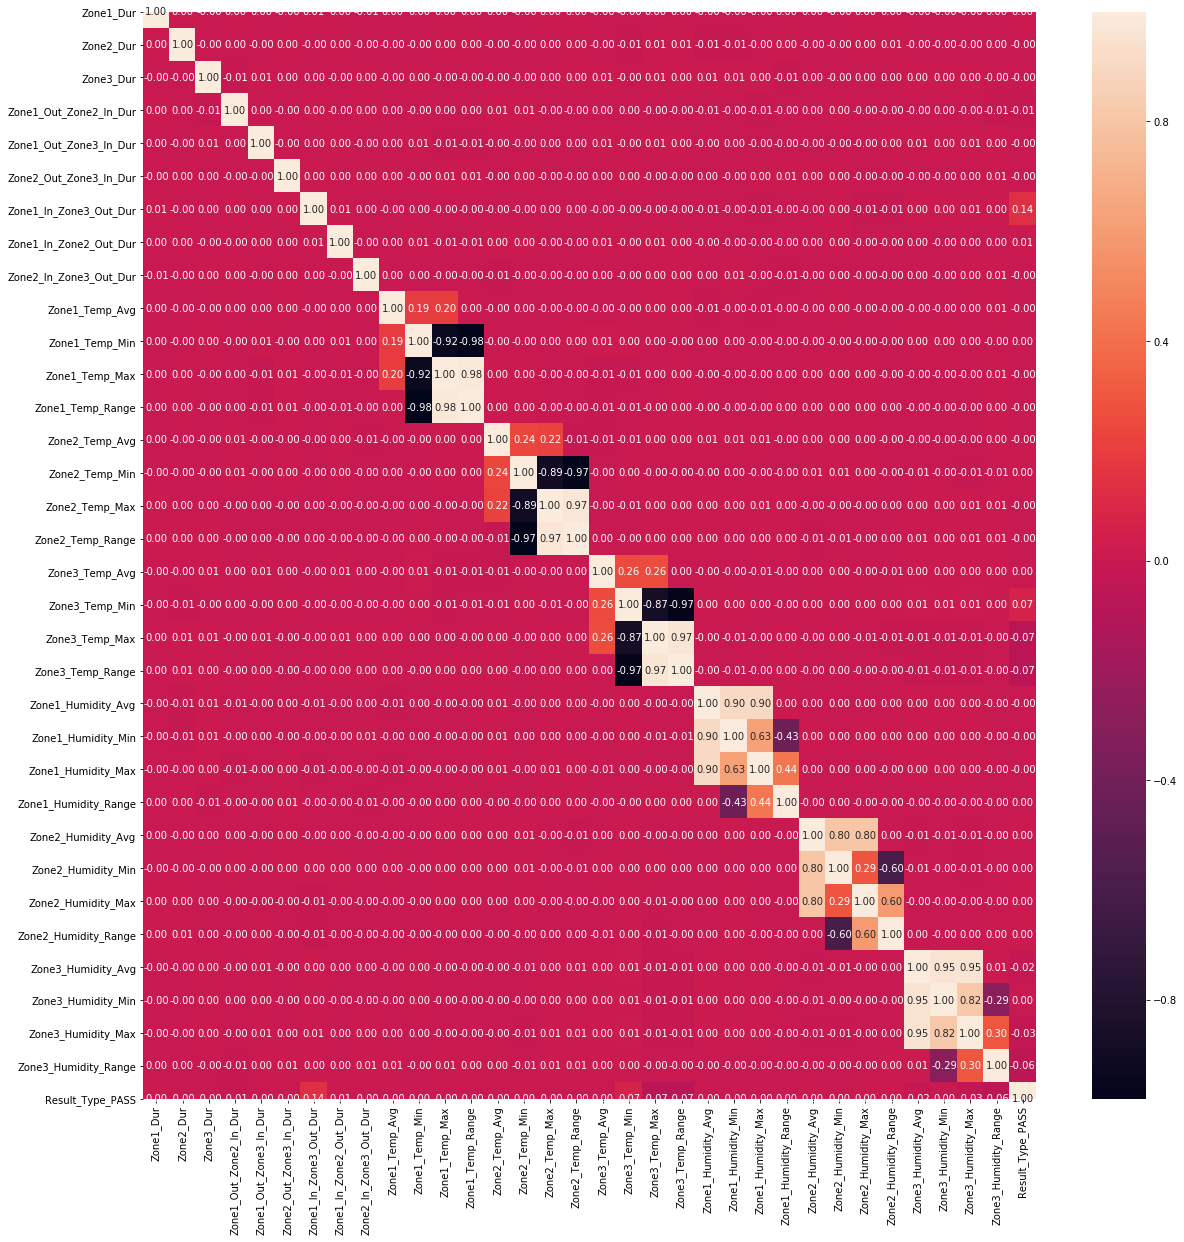

In [25]:
# Heat map
plt.figure(figsize=(20,20))
sns.heatmap(df_clean[cols2].corr(), annot=True, fmt='.2f');

# Starting with scikit-learn

1. Here at the moment, just focus on predicting if it's pass or not (If pass, the value is 1, and if not pass the value is 0)
2. Since the 72% of the data is "pass", this dataset is imbalanced. So we used `random sampling` method.

### 1. Multiclass classification  [wiki](https://en.wikipedia.org/wiki/Multiclass_classification)

#### Decision Tree

In [26]:
# 1.
cat_col_1 = ['Zone1Position', 'Zone2Position', 'Zone3Position', 'SKU',
          'Zone1_Row_Num', 'Zone1_Col_Num', 'Zone2_Row_Num', 'Zone2_Col_num', 'Zone3_Row_Num', 'Zone3_Col_Num',
          'Zone1_Left_Block_Bin', 'Zone1_Right_Block_Bin', 'Zone1_Area', 'Zone3_Area', 'Block_Num', 'Block_Position']

def create_dummy_df(df, cat_cols, dummy_na):
    for col in  cat_cols:
        try:
            # for each cat add dummy var, drop original column
            df = pd.concat([df.drop(col, axis=1), pd.get_dummies(df[col], prefix=col, prefix_sep='_', drop_first=False, dummy_na=dummy_na)], axis=1)
        except:
            continue
    return df

df_clean_1 = create_dummy_df(df, cat_col_1, dummy_na=False)

In [27]:
df_clean_1['Result_Type'] = df_clean_1['Result_Type'].astype('object', copy=False)

In [28]:
X = df_clean_1.drop(['Date','Result_Type'], axis=1)
y = df_clean_1.Result_Type

In [29]:
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
from sklearn import metrics
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

sampler = RandomUnderSampler(random_state=40)
X_resampled, y_resampled = sampler.fit_resample(X, y)
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size = .20, random_state=30)

Using TensorFlow backend.


In [30]:
from sklearn.tree import DecisionTreeClassifier 

# Train with RandomForest
tree = DecisionTreeClassifier()
tree = tree.fit(X_train, y_train)

#calculate scores for the model
y_train_pred = tree.predict(X_train)
y_test_pred = tree.predict(X_test)

In [31]:
# accuracy_score, f1_score, precision_score, recall_score
print("The accuracy score is {:.3f}".format(accuracy_score(y_test, y_test_pred)))

The accuracy score is 0.594


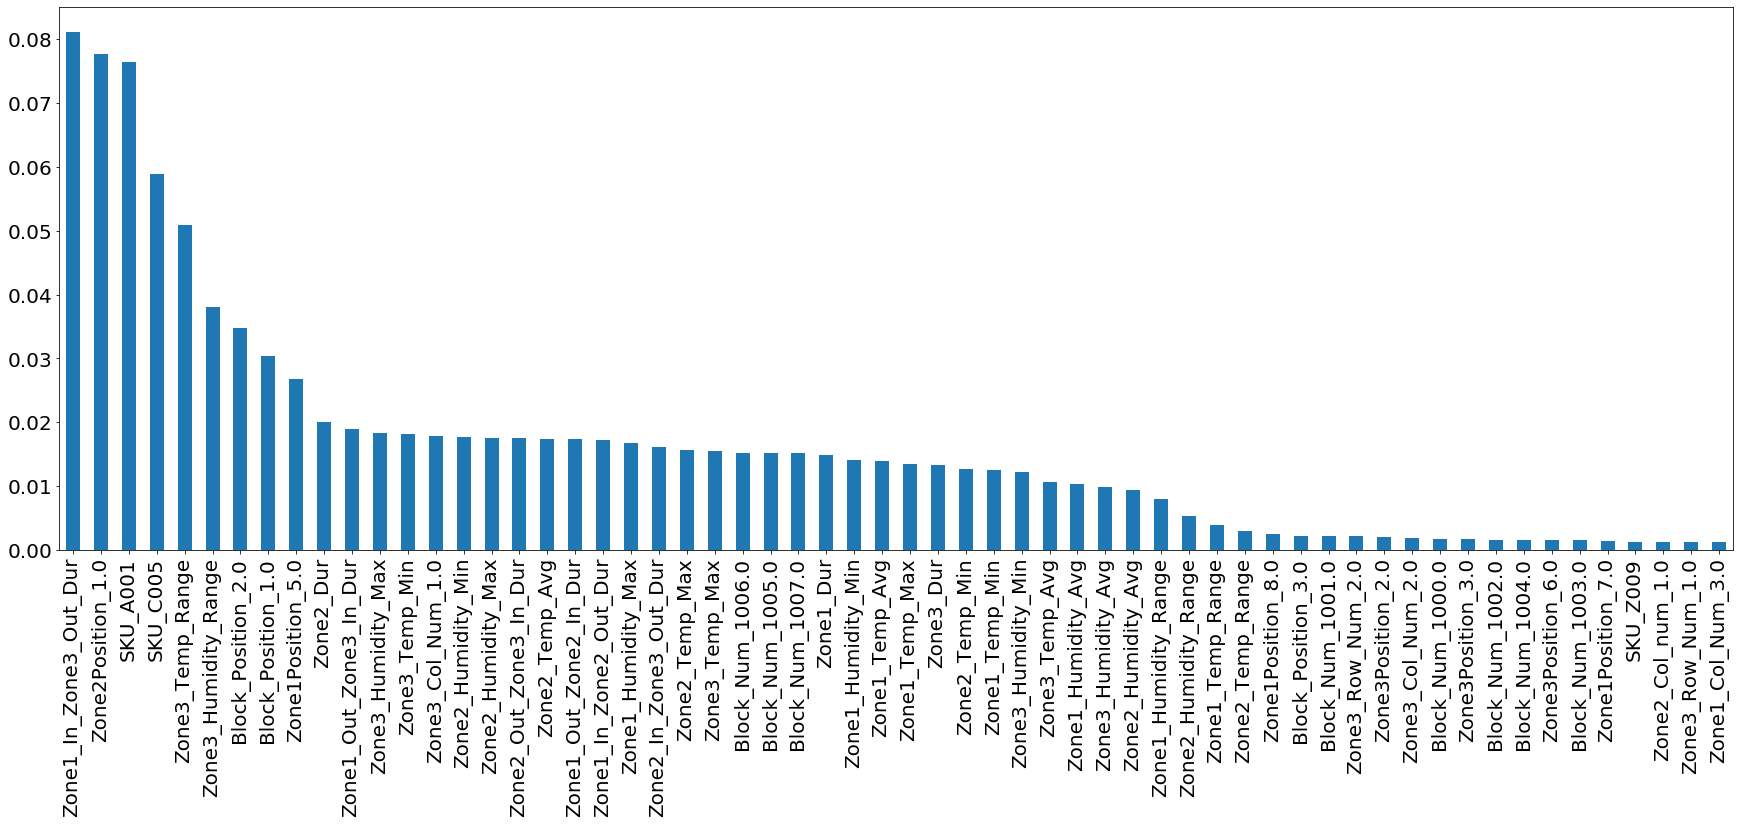

In [32]:
# Feature importance
plt.figure(figsize=(30,10))

feat_importances = pd.Series(tree.feature_importances_, index=X_train.columns)
feat_importances.nlargest(60).plot(kind='bar', fontsize = 20)

plt.show()

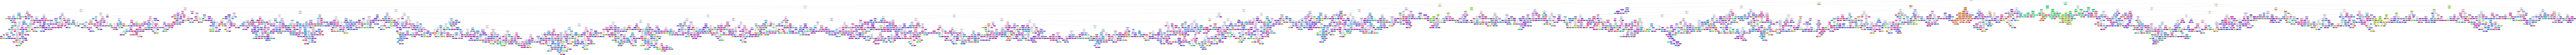

In [33]:
# Visualize Tree
import graphviz
from sklearn.tree import export_graphviz

export_graphviz(tree, out_file='tree.dot', 
                feature_names = X.columns,
                class_names = y,
                rounded = True, proportion = False, 
                precision = 2, filled = True)

# Convert to png using system command (requires Graphviz)
from subprocess import call
call(['dot', '-Tpng', 'tree.dot', '-o', 'tree.png', '-Gdpi=600'])

# Display in jupyter notebook
from IPython.display import Image
Image(filename = 'tree.png')

#### Random Forest

In [34]:
from sklearn.ensemble import RandomForestClassifier

# Train with RandomForest
forest = RandomForestClassifier(n_estimators=100, 
                               random_state=50, 
                               n_jobs=-1)
forest = forest.fit(X_train, y_train)

#calculate scores for the model
y_train_pred = forest.predict(X_train)
y_test_pred = forest.predict(X_test)

In [35]:
# accuracy_score, f1_score, precision_score, recall_score
print("The accuracy score is {:.3f}".format(accuracy_score(y_test, y_test_pred)))

The accuracy score is 0.603


### 2. Binary Classification [wiki](https://en.wikipedia.org/wiki/Binary_classification) - PASS(1) & Not PASS(0)

In [36]:
# Split target variable (= 'Result_Type_PASS')
# At the moment drop 'Date' column as randomforest does not take datetime dtype
X = df_clean.drop(['Date', 'Result_Type_Defect_1', 'Result_Type_Defect_2','Result_Type_Defect_3','Result_Type_Defect_4', 'Result_Type_Defect_5', 'Result_Type_PASS'], axis=1)
y = df_clean[['Result_Type_PASS']]

In [37]:
# Random sampling 
sampler = RandomUnderSampler(random_state=40)
X_resampled, y_resampled = sampler.fit_resample(X, y)
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size = .20, random_state=30)

In [38]:
# Train with RandomForest
forest = RandomForestClassifier(n_estimators=100, 
                               random_state=50, 
                               n_jobs=-1)
forest = forest.fit(X_train, y_train)

#calculate scores for the model
y_train_pred = forest.predict(X_train)
y_test_pred = forest.predict(X_test)

An article that explains [Accuracy, Precision, Recall & F1 Score](https://blog.exsilio.com/all/accuracy-precision-recall-f1-score-interpretation-of-performance-measures/)

In [39]:
# accuracy_score, f1_score, precision_score, recall_score
print("The accuracy score is {:.3f}".format(accuracy_score(y_test, y_test_pred)))
print("The f1_score is {:.3f}".format(f1_score(y_test, y_test_pred)))
print("The precision score is {:.3f}".format(precision_score(y_test, y_test_pred)))
print("The recall score is {:.3f}".format(recall_score(y_test, y_test_pred)))    

The accuracy score is 0.787
The f1_score is 0.811
The precision score is 0.727
The recall score is 0.916


In [40]:
# confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_test_pred)
print(cm)

[[2704 1407]
 [ 344 3749]]


#### Confusion Matrix

<p align="center"><img src = "C13314_06_05.jpg" width=300></p>

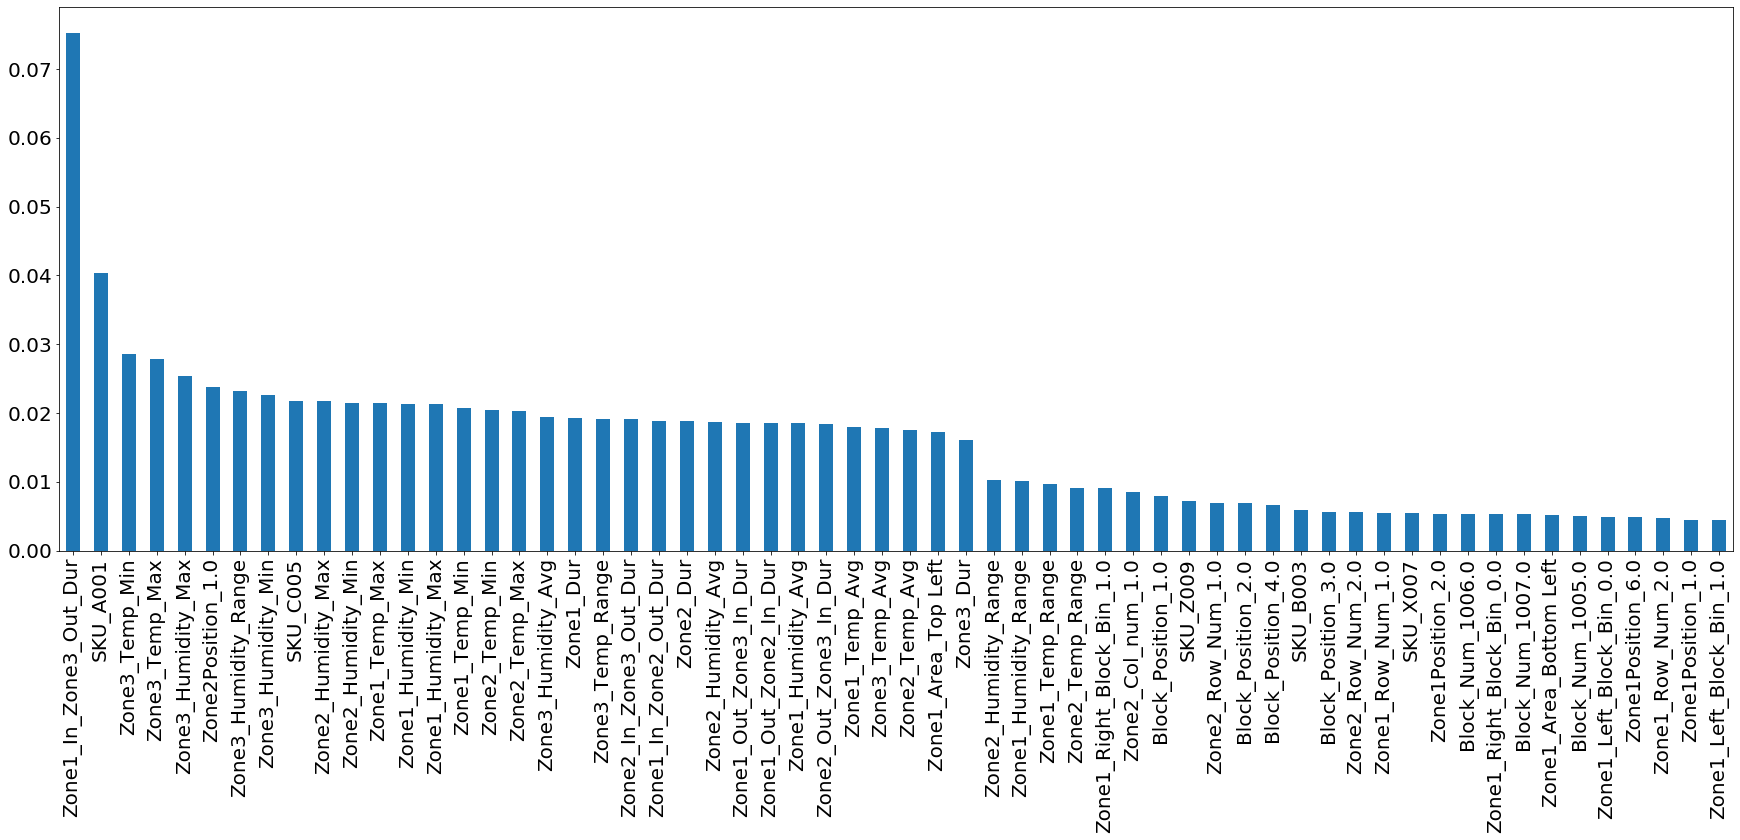

In [41]:
# Feature importance
plt.figure(figsize=(30,10))

feat_importances = pd.Series(forest.feature_importances_, index=X_train.columns)
feat_importances.nlargest(60).plot(kind='bar', fontsize = 20)

plt.show()

- `Zone1_In_Zone3_Out_Dur` has a significantly high importance
- `SKU_A001` has the secondly high importance
- `Zone3_Temp_Min`, `Zone3_Temp_Max` have the thirdly high importance

In [42]:
# Visualize the tree (Ref:https://medium.com/@garg.mohit851/random-forest-visualization-3f76cdf6456f)
# It takes too long to complete, so I remove it for now
""" import os
from sklearn.tree import export_graphviz
import six
import pydot
from sklearn import tree
dotfile = six.StringIO()
i_tree = 0
for tree_in_forest in forest.estimators_:
    export_graphviz(tree_in_forest,out_file='tree.dot',
    feature_names=X.columns,
    filled=True,
    rounded=True)
    (graph,) = pydot.graph_from_dot_file('tree.dot')
    name = 'tree' + str(i_tree)
    graph.write_png(name+  '.png')
    
    os.system('dot -Tpng tree.dot -o tree.png')
    i_tree +=1 """

" import os\nfrom sklearn.tree import export_graphviz\nimport six\nimport pydot\nfrom sklearn import tree\ndotfile = six.StringIO()\ni_tree = 0\nfor tree_in_forest in forest.estimators_:\n    export_graphviz(tree_in_forest,out_file='tree.dot',\n    feature_names=X.columns,\n    filled=True,\n    rounded=True)\n    (graph,) = pydot.graph_from_dot_file('tree.dot')\n    name = 'tree' + str(i_tree)\n    graph.write_png(name+  '.png')\n    \n    os.system('dot -Tpng tree.dot -o tree.png')\n    i_tree +=1 "

### 3. Binary Classification - Defect_1 (1) or Not Defect_1 (0)

In [43]:
# Plotting Zone1_In_Zone3_Out_Dur
X = df_clean.drop(['Date', 'Result_Type_Defect_1', 'Result_Type_Defect_2','Result_Type_Defect_3','Result_Type_Defect_4', 'Result_Type_Defect_5', 'Result_Type_PASS'], axis=1)
y = df_clean[['Result_Type_Defect_1']]

sampler = RandomUnderSampler(random_state=41)
X_resampled, y_resampled = sampler.fit_resample(X, y)
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size = .20, random_state=30)

In [44]:
forest = RandomForestClassifier(n_estimators=100, 
                               random_state=50, 
                               n_jobs=-1)
forest = forest.fit(X_train, y_train)

#calculate scores for the model
y_train_pred = forest.predict(X_train)
y_test_pred = forest.predict(X_test)

In [45]:
# accuracy_score, f1_score, precision_score, recall_score
print("The accuracy score is {:.3f}".format(accuracy_score(y_test, y_test_pred)))
print("The f1_score is {:.3f}".format(f1_score(y_test, y_test_pred)))
print("The precision score is {:.3f}".format(precision_score(y_test, y_test_pred)))
print("The recall score is {:.3f}".format(recall_score(y_test, y_test_pred)))  

The accuracy score is 0.928
The f1_score is 0.922
The precision score is 0.997
The recall score is 0.857


- Predictiong Defect_2 acheved high accuracy, f1_score, precision, recall even after random sampling

In [46]:
# confusion matrix
cm = confusion_matrix(y_test, y_test_pred)
print(cm)

[[796   2]
 [112 672]]


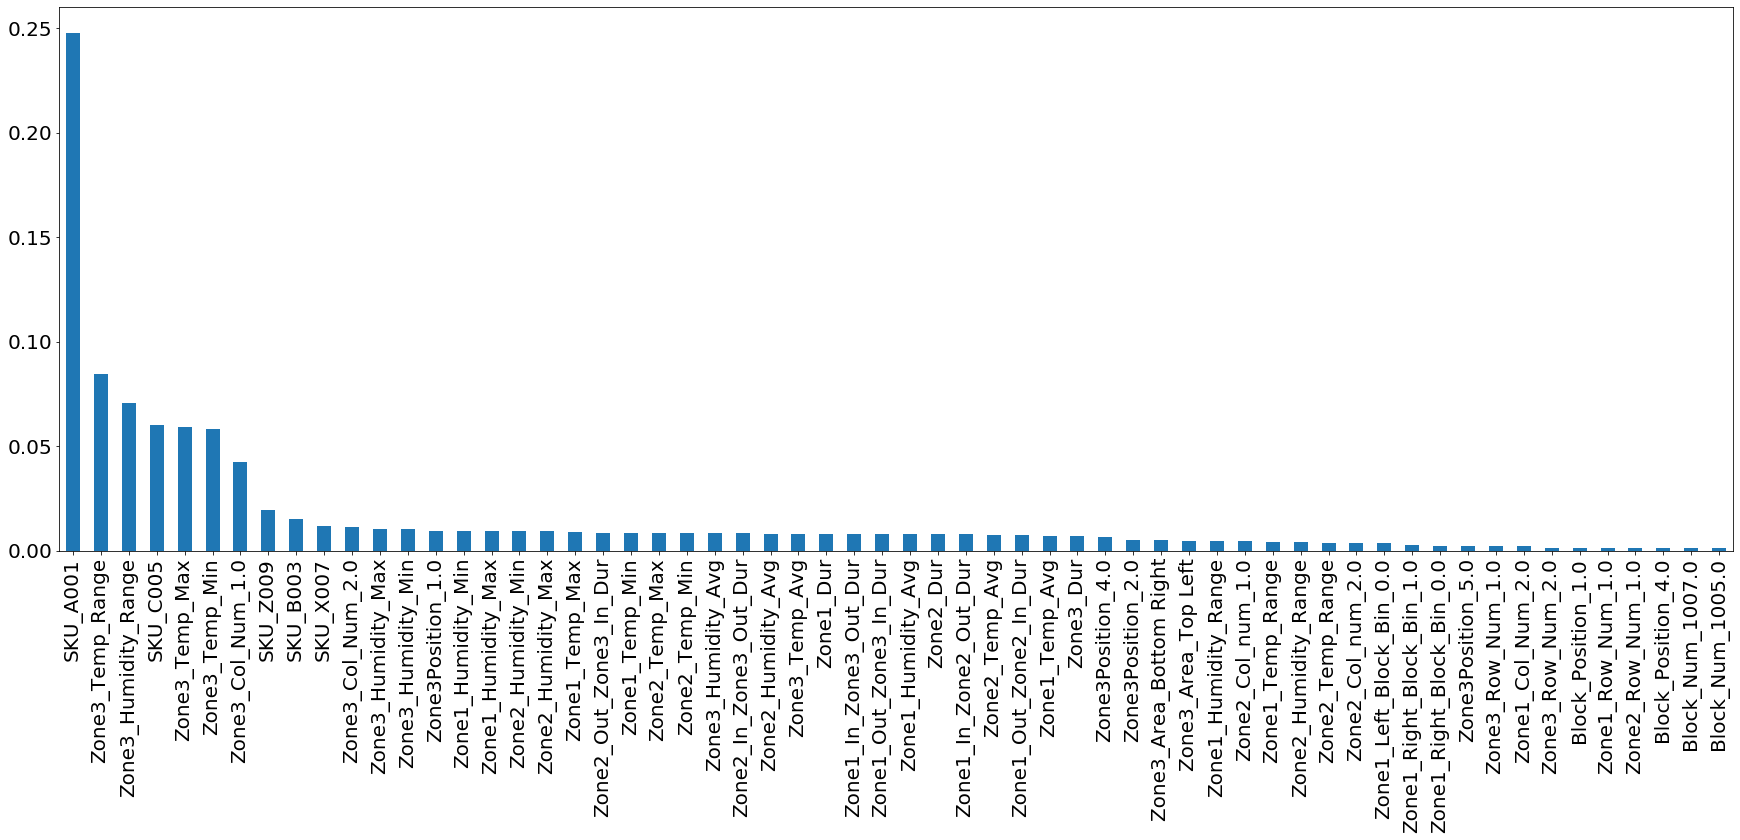

In [47]:
# Feature importance
plt.figure(figsize=(30,10))

feat_importances = pd.Series(forest.feature_importances_, index=X_train.columns)
feat_importances.nlargest(60).plot(kind='bar', fontsize = 20)

plt.show()

- `SKU_A001` has a significantly high importance for prediction of Defect_1 -> it seems worth more investigation

### 4. Binary Classification - Defect_2 (1) or Not Defect_2 (0)

In [48]:
# Plotting Zone1_In_Zone3_Out_Dur
X = df_clean.drop(['Date', 'Result_Type_Defect_1', 'Result_Type_Defect_2','Result_Type_Defect_3','Result_Type_Defect_4', 'Result_Type_Defect_5', 'Result_Type_PASS'], axis=1)
y = df_clean[['Result_Type_Defect_2']]

sampler = RandomUnderSampler(random_state=42)
X_resampled, y_resampled = sampler.fit_resample(X, y)
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size = .20, random_state=30)

In [49]:
forest = RandomForestClassifier(n_estimators=100, 
                               random_state=50, 
                               n_jobs=-1)
forest = forest.fit(X_train, y_train)

#calculate scores for the model
y_train_pred = forest.predict(X_train)
y_test_pred = forest.predict(X_test)

In [50]:
# accuracy_score, f1_score, precision_score, recall_score
print("The accuracy score is {:.3f}".format(accuracy_score(y_test, y_test_pred)))
print("The f1_score is {:.3f}".format(f1_score(y_test, y_test_pred)))
print("The precision score is {:.3f}".format(precision_score(y_test, y_test_pred)))
print("The recall score is {:.3f}".format(recall_score(y_test, y_test_pred)))  

The accuracy score is 0.936
The f1_score is 0.929
The precision score is 0.990
The recall score is 0.876


- Predictiong Defect_2 acheved high accuracy, f1_score, precision, recall even after random sampling

In [51]:
# confusion matrix
cm = confusion_matrix(y_test, y_test_pred)
print(cm)

[[804   7]
 [ 94 664]]


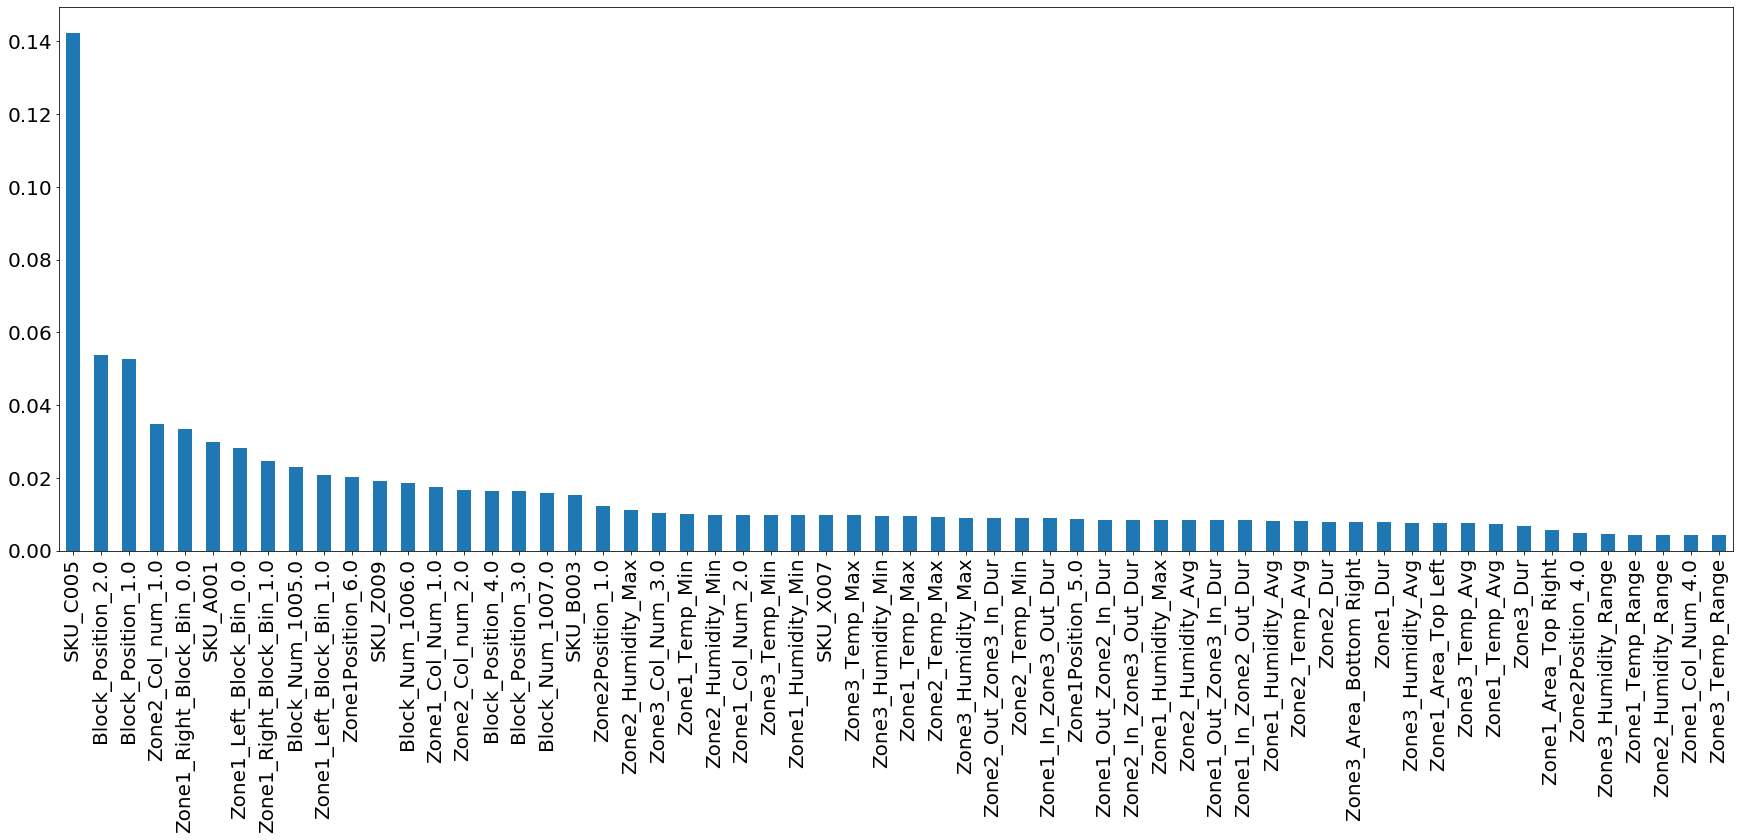

In [52]:
# Feature importance
plt.figure(figsize=(30,10))

feat_importances = pd.Series(forest.feature_importances_, index=X_train.columns)
feat_importances.nlargest(60).plot(kind='bar', fontsize = 20)

plt.show()

- `SKU_C005` has a significantly high importance for prediction of Defect_2 -> it seems worth more investigation

### 5. Binary Classification - Defect_3 (1) or Not Defect_3 (0)

In [53]:
# Plotting Zone1_In_Zone3_Out_Dur
X = df_clean.drop(['Date', 'Result_Type_Defect_1', 'Result_Type_Defect_2','Result_Type_Defect_3','Result_Type_Defect_4', 'Result_Type_Defect_5', 'Result_Type_PASS'], axis=1)
y = df_clean[['Result_Type_Defect_3']]

sampler = RandomUnderSampler(random_state=43)
X_resampled, y_resampled = sampler.fit_resample(X, y)
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size = .20, random_state=30)

In [54]:
forest = RandomForestClassifier(n_estimators=100, 
                               random_state=50, 
                               n_jobs=-1)
forest = forest.fit(X_train, y_train)

#calculate scores for the model
y_train_pred = forest.predict(X_train)
y_test_pred = forest.predict(X_test)

In [55]:
# accuracy_score, f1_score, precision_score, recall_score
print("The accuracy score is {:.3f}".format(accuracy_score(y_test, y_test_pred)))
print("The f1_score is {:.3f}".format(f1_score(y_test, y_test_pred)))
print("The precision score is {:.3f}".format(precision_score(y_test, y_test_pred)))
print("The recall score is {:.3f}".format(recall_score(y_test, y_test_pred)))  

The accuracy score is 0.955
The f1_score is 0.954
The precision score is 0.986
The recall score is 0.924


- Predictiong Defect_3 acheved high accuracy, f1_score, precision, recall even after random sampling

In [56]:
# confusion matrix
cm = confusion_matrix(y_test, y_test_pred)
print(cm)

[[1297   18]
 [ 102 1243]]


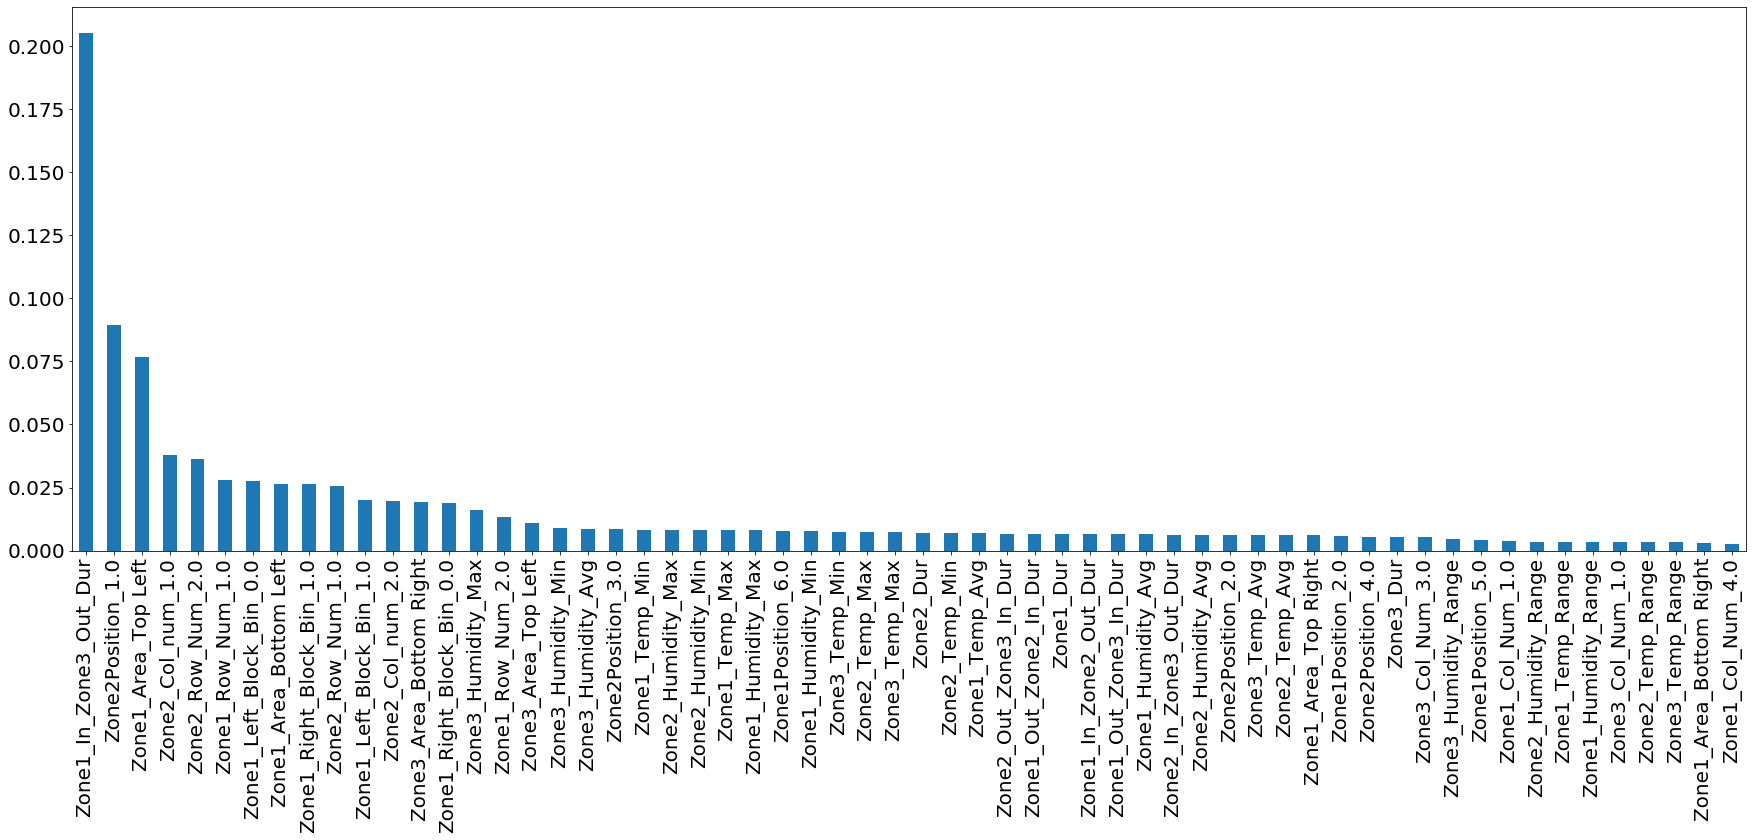

In [57]:
# Feature importance
plt.figure(figsize=(30,10))

feat_importances = pd.Series(forest.feature_importances_, index=X_train.columns)
feat_importances.nlargest(60).plot(kind='bar', fontsize = 20)

plt.show()

### 6. Binary Classification - Defect_4 (1) or Not Defect_4 (0)

In [58]:
# Plotting Zone1_In_Zone3_Out_Dur
X = df_clean.drop(['Date', 'Result_Type_Defect_1', 'Result_Type_Defect_2','Result_Type_Defect_3','Result_Type_Defect_4', 'Result_Type_Defect_5', 'Result_Type_PASS'], axis=1)
y = df_clean[['Result_Type_Defect_4']]

sampler = RandomUnderSampler(random_state=44)
X_resampled, y_resampled = sampler.fit_resample(X, y)
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size = .20, random_state=30)

In [59]:
forest = RandomForestClassifier(n_estimators=100, 
                               random_state=50, 
                               n_jobs=-1)
forest = forest.fit(X_train, y_train)

#calculate scores for the model
y_train_pred = forest.predict(X_train)
y_test_pred = forest.predict(X_test)

In [60]:
# accuracy_score, f1_score, precision_score, recall_score
print("The accuracy score is {:.3f}".format(accuracy_score(y_test, y_test_pred)))
print("The f1_score is {:.3f}".format(f1_score(y_test, y_test_pred)))
print("The precision score is {:.3f}".format(precision_score(y_test, y_test_pred)))
print("The recall score is {:.3f}".format(recall_score(y_test, y_test_pred)))  

The accuracy score is 0.547
The f1_score is 0.567
The precision score is 0.555
The recall score is 0.581


- The scores of prediction for Defect_4 is lower than those for Defect_1, Defect_2, Defect_3

In [61]:
# confusion matrix
cm = confusion_matrix(y_test, y_test_pred)
print(cm)

[[307 292]
 [263 364]]


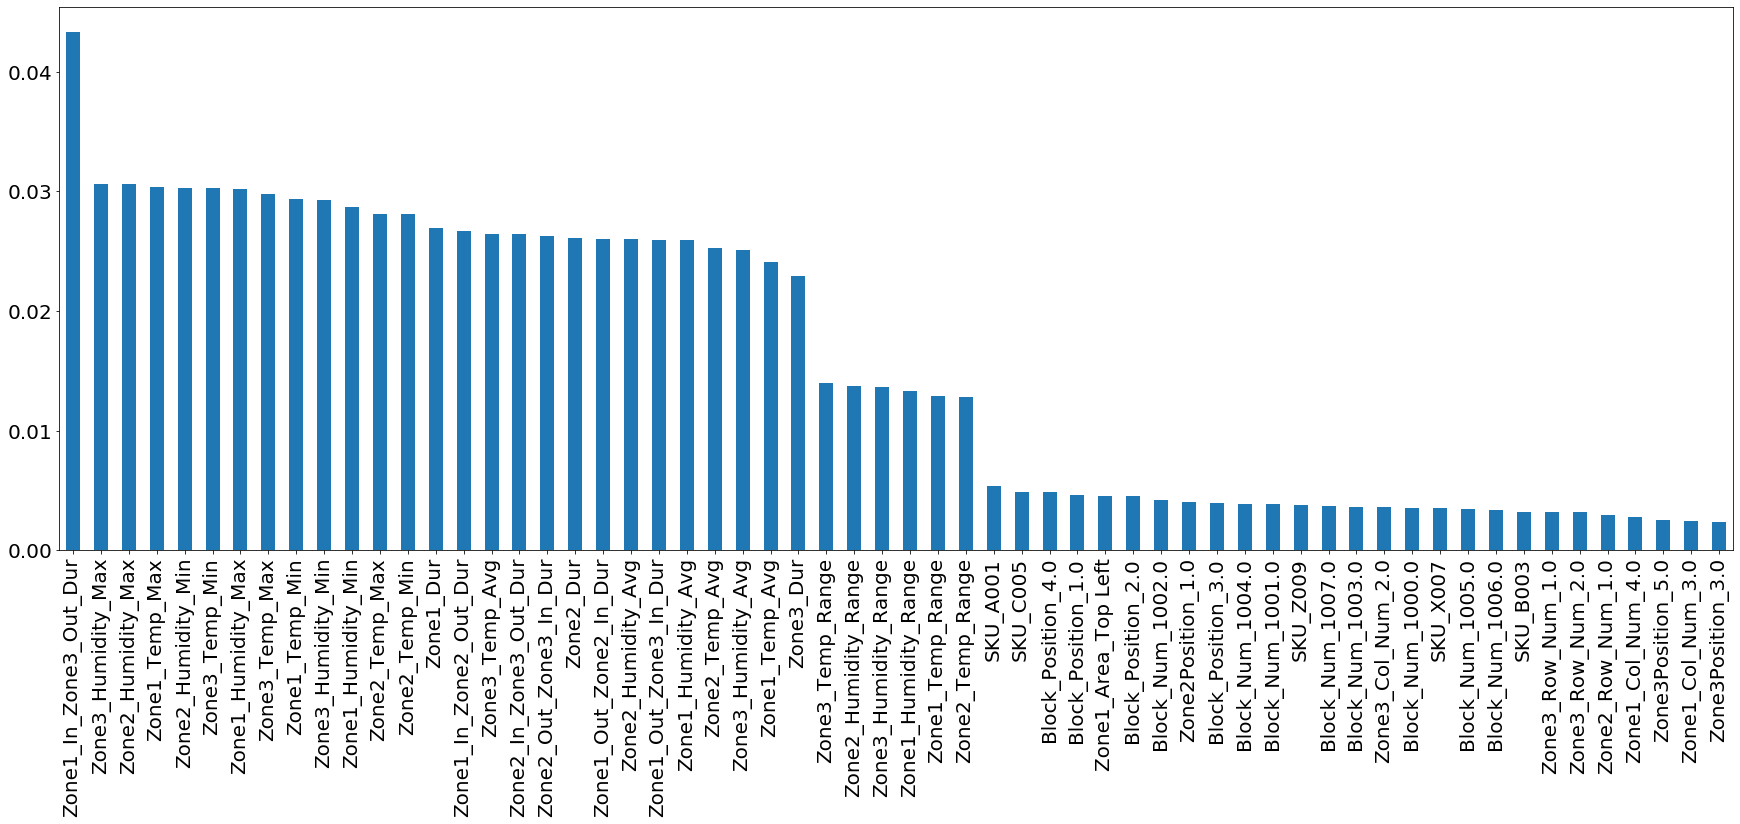

In [62]:
# Feature importance
plt.figure(figsize=(30,10))

feat_importances = pd.Series(forest.feature_importances_, index=X_train.columns)
feat_importances.nlargest(60).plot(kind='bar', fontsize = 20)

plt.show()

### 7. Binary Classification - Defect_5 (1) or Not Defect_5 (0)

In [63]:
# Plotting Zone1_In_Zone3_Out_Dur
X = df_clean.drop(['Date', 'Result_Type_Defect_1', 'Result_Type_Defect_2','Result_Type_Defect_3','Result_Type_Defect_4', 'Result_Type_Defect_5', 'Result_Type_PASS'], axis=1)
y = df_clean[['Result_Type_Defect_5']]

sampler = RandomUnderSampler(random_state=45)
X_resampled, y_resampled = sampler.fit_resample(X, y)
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size = .20, random_state=30)

In [64]:
forest = RandomForestClassifier(n_estimators=100, 
                               random_state=50, 
                               n_jobs=-1)
forest = forest.fit(X_train, y_train)

#calculate scores for the model
y_train_pred = forest.predict(X_train)
y_test_pred = forest.predict(X_test)

In [65]:
# accuracy_score, f1_score, precision_score, recall_score
print("The accuracy score is {:.3f}".format(accuracy_score(y_test, y_test_pred)))
print("The f1_score is {:.3f}".format(f1_score(y_test, y_test_pred)))
print("The precision score is {:.3f}".format(precision_score(y_test, y_test_pred)))
print("The recall score is {:.3f}".format(recall_score(y_test, y_test_pred)))  

The accuracy score is 0.559
The f1_score is 0.565
The precision score is 0.565
The recall score is 0.564


- The scores of prediction for Defect_5 is lower than those for Defect_1, Defect_2, Defect_3 (Almost same as Defect_4)

In [66]:
# confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_test_pred)
print(cm)

[[318 257]
 [258 334]]


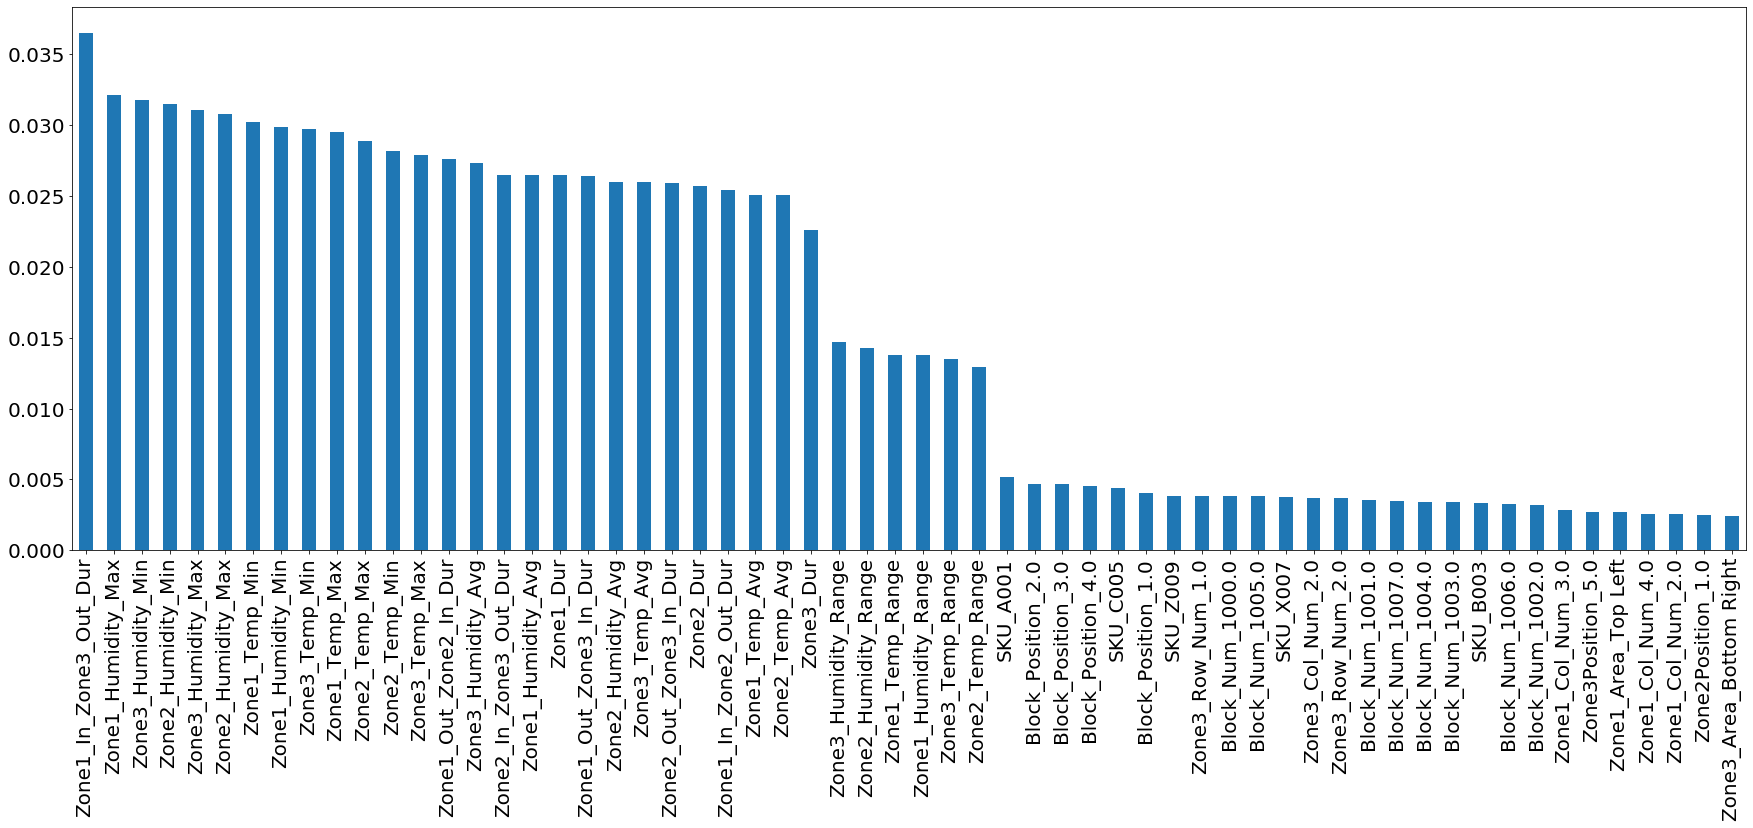

In [67]:
# Feature importance
plt.figure(figsize=(30,10))

feat_importances = pd.Series(forest.feature_importances_, index=X_train.columns)
feat_importances.nlargest(60).plot(kind='bar', fontsize = 20)

plt.show()

# Feature Engineering

### 1. Adding weekday column (Monday, which is denoted by 0 and ends on Sunday which is denoted by 6.)

In [68]:
# convert the date to 'weekday'
# (I've checked adding 'date' and 'month' but it lower the f1 score)
df_clean['weekday'] = np.uint8(df_clean['Date'].dt.weekday)

In [69]:
X = df_clean.drop(['Date', 'Result_Type_Defect_1', 'Result_Type_Defect_2','Result_Type_Defect_3','Result_Type_Defect_4', 'Result_Type_Defect_5', 'Result_Type_PASS'], axis=1)
y = df_clean[['Result_Type_PASS']]

X_resampled, y_resampled = sampler.fit_resample(X, y)
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size = .20, random_state=30)

# Train ML model by only numerical columns, with RandomForest
forest = RandomForestClassifier(n_estimators=100, 
                               random_state=50, 
                               n_jobs=-1)
forest = forest.fit(X_train, y_train.squeeze())

#calculate scores for the model
y_train_pred = forest.predict(X_train)
y_test_pred = forest.predict(X_test)

#New scores
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
print("The accuracy score is {:.3f}".format(accuracy_score(y_test, y_test_pred)))
print("The f1_score is {:.3f}".format(f1_score(y_test, y_test_pred)))
print("The precision score is {:.3f}".format(precision_score(y_test, y_test_pred)))
print("The recall score is {:.3f}".format(recall_score(y_test, y_test_pred)))    

The accuracy score is 0.790
The f1_score is 0.814
The precision score is 0.730
The recall score is 0.920


- Weekday value did not contribute to the higher scores

# Grid search 